# Bank Churn Analysis

## Data Collection and Data Exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\welcome\xebia_training_data\datasets\Bank_churn_modelling.csv")
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Unwanted Columns
 Rownumber,CustomerID,Surname

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
#Catagorical columns
cat=['Geography','Gender','HasCrCard','IsActiveMember','Exited']
#Numerical columns
numerical=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


it shows that more than 25% customers have 0 balance

## Data Cleaning

In [10]:
df.duplicated().sum()

0

In [11]:
#incase the duplicate is present
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [14]:
#here excited is not a problem
#in skewness is greater than 1 then drop last one percent  
#df[variable]=df[df.variable<df.variable.quantile(0.99)]

## Exploratory data Analysis

### Data Visualization

#### Univariate Analysis

In [17]:
#Catagorical columns
cat=['Geography','Gender','HasCrCard','IsActiveMember','Exited']
#Numerical columns
numerical=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

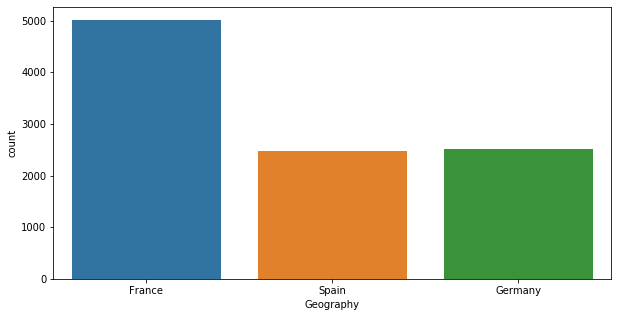

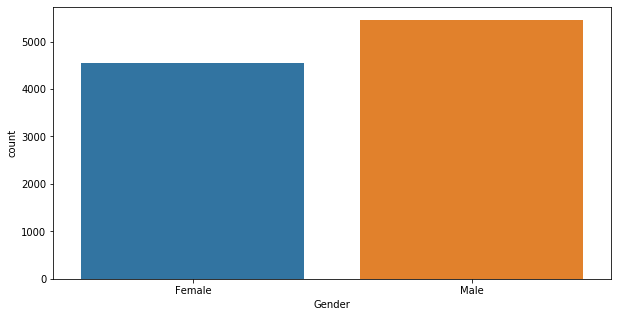

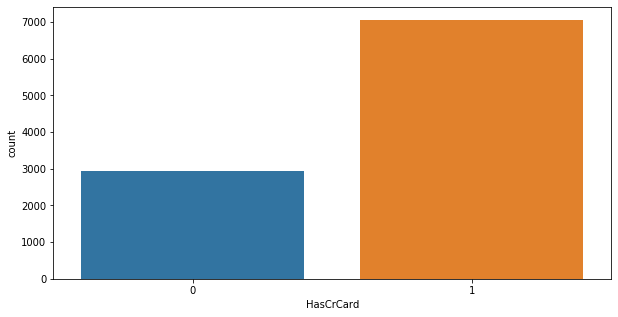

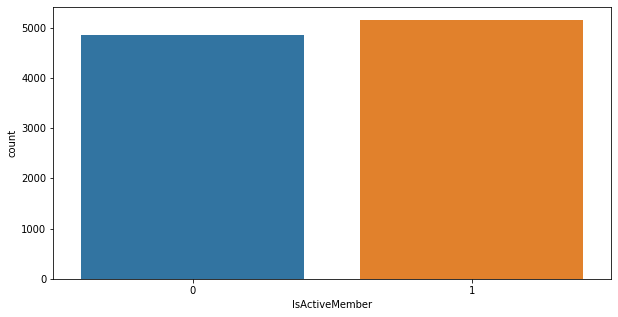

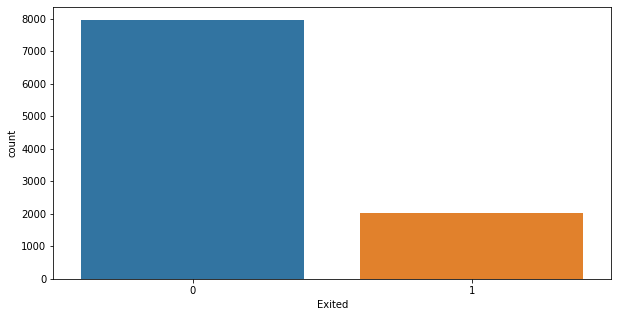

In [18]:
#Catagorical 
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.show()

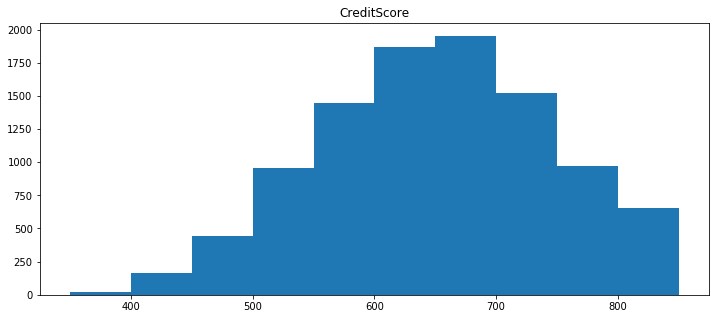

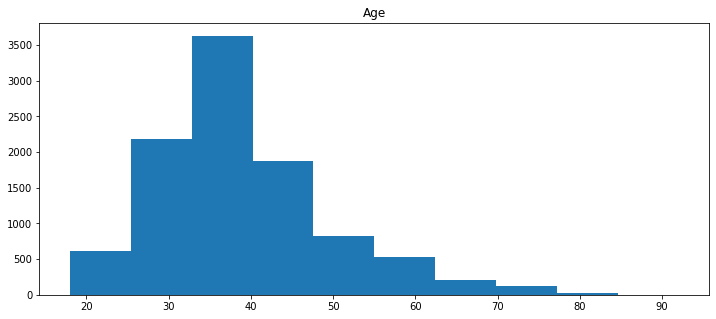

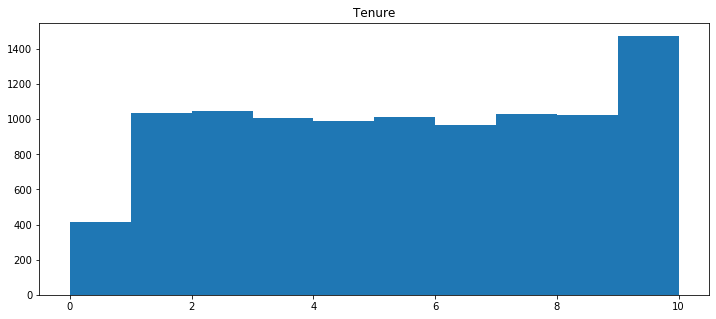

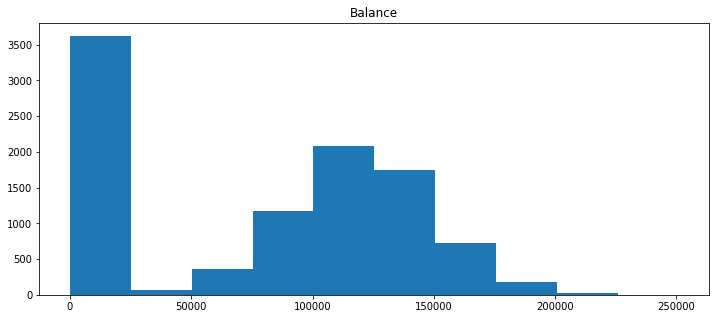

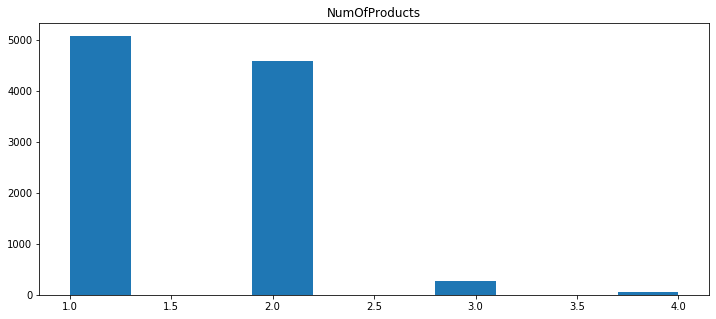

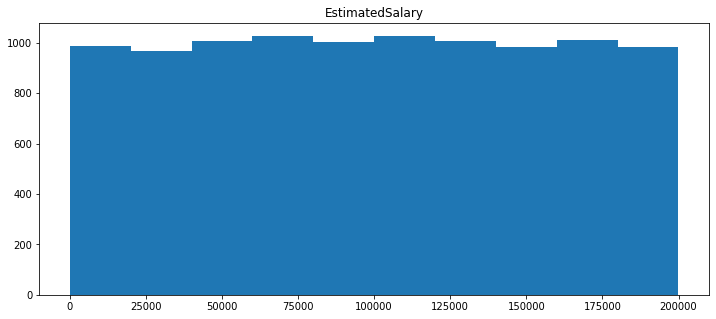

In [26]:
#Numeric
for i in numerical:
    plt.figure(figsize=(12,5))
    plt.hist(df[i])
    plt.title(i)
    plt.show()

#### Bivariate Analysis

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'Exited =0' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys


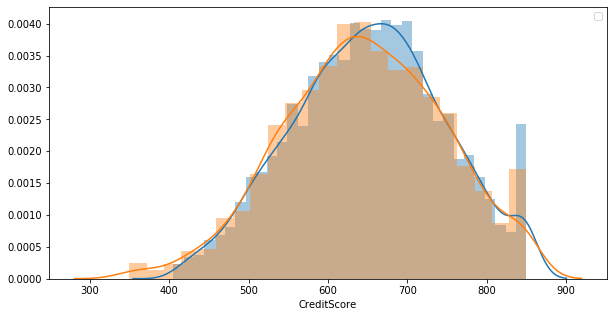

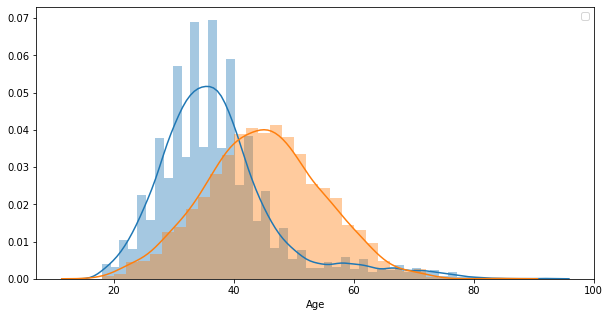

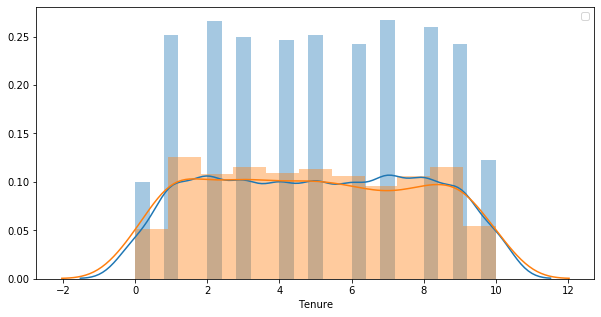

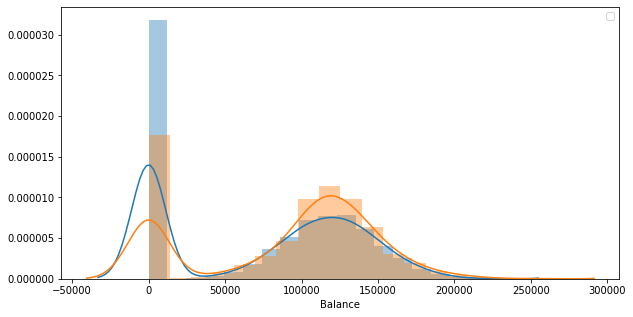

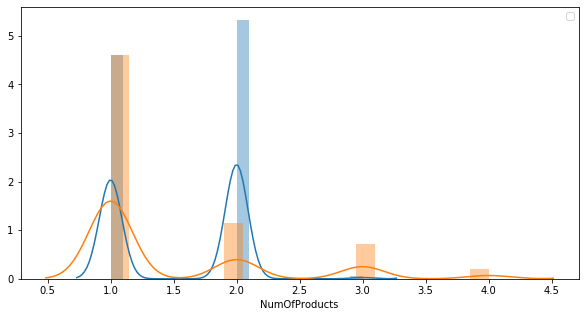

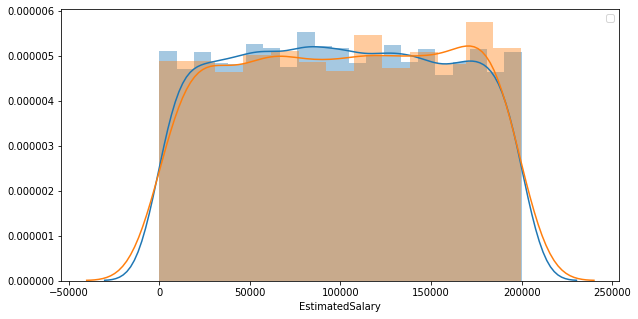

In [31]:
#numeric v/s Catagorical
#numerical v/s exited
for i in numerical:
    plt.figure(figsize=(10,5))
    sns.distplot(df[i][df['Exited']==0])
    sns.distplot(df[i][df['Exited']==1])
    plt.legend(['Exited =0'],['Exited =1'])
    plt.show()

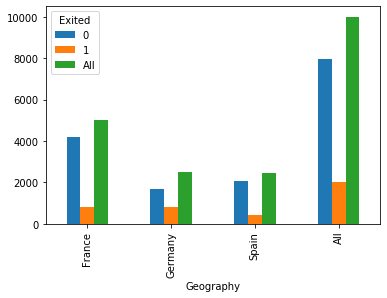

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000


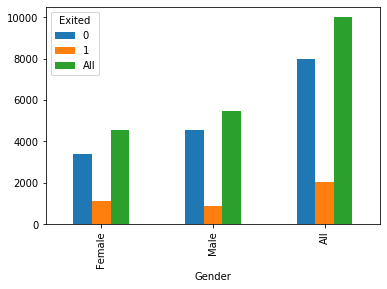

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000


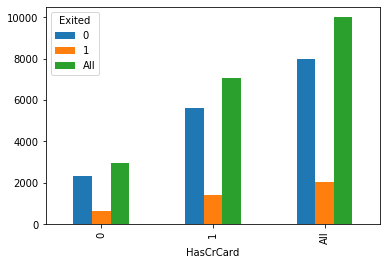

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000


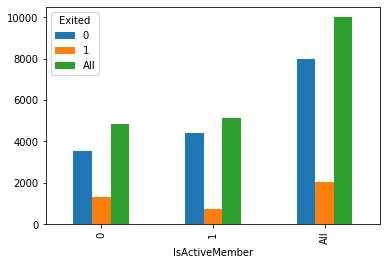

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000


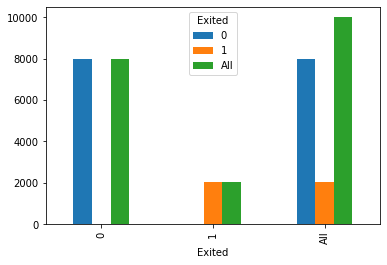

Exited     0     1    All
Exited                   
0       7963     0   7963
1          0  2037   2037
All     7963  2037  10000


In [34]:
#catagorical v/s catagorical
for i in cat:
    output=pd.crosstab(df[i],df['Exited'],margins=True)
    output.plot(kind='bar')
    plt.show()
    print(output)